# Proyecto de curso Machine Learning

## 1.) Curación de datos

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



dataset = 'https://archive.ics.uci.edu/ml/'\
'machine-learning-databases/poker/poker-hand-testing.data'
print('From URL:', dataset)
df = pd.read_csv(dataset, header=None, names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','CLASS'])
df.head(50)

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0
5,1,3,4,5,3,4,1,12,4,6,0
6,2,6,4,11,2,3,4,9,1,7,0
7,3,2,4,9,3,7,4,3,4,5,0
8,4,4,3,13,1,8,3,9,3,10,0
9,1,9,3,8,4,4,1,7,3,5,0


In [3]:
# Informacion del DataFrame
print(df.info())
print('shape:', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   S1      1000000 non-null  int64
 1   C1      1000000 non-null  int64
 2   S2      1000000 non-null  int64
 3   C2      1000000 non-null  int64
 4   S3      1000000 non-null  int64
 5   C3      1000000 non-null  int64
 6   S4      1000000 non-null  int64
 7   C4      1000000 non-null  int64
 8   S5      1000000 non-null  int64
 9   C5      1000000 non-null  int64
 10  CLASS   1000000 non-null  int64
dtypes: int64(11)
memory usage: 83.9 MB
None
shape: (1000000, 11)


In [4]:
df.value_counts('CLASS')

CLASS
0    501209
1    422498
2     47622
3     21121
4      3885
5      1996
6      1424
7       230
8        12
9         3
Name: count, dtype: int64

## 2.) Selección de Características

### 2.1.) Componentes Principales (PCA)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [26]:
# Estandarizar los rangos de las cartas
scaler = StandardScaler()
X = df.iloc[:,:-1].values
X_scaled = scaler.fit_transform(X)
X

array([[ 1,  1,  1, ...,  3,  1, 12],
       [ 3, 12,  3, ...,  5,  2,  5],
       [ 1,  9,  4, ...,  2,  3,  9],
       ...,
       [ 1, 11,  4, ..., 13,  2,  7],
       [ 3, 11,  1, ..., 13,  2,  8],
       [ 2,  5,  2, ...,  3,  3,  3]], dtype=int64)

In [7]:
# Calculamos la matriz de covarianza
print('NumPy covariance matrix: \n%s' %np.cov(X_scaled.T))

NumPy covariance matrix: 
[[ 1.00000100e+00 -1.45032650e-03 -2.16472096e-02  1.21249731e-03
  -1.93352870e-02  4.14353217e-04 -1.92631638e-02 -5.93354964e-05
  -1.89256553e-02  1.54525919e-03]
 [-1.45032650e-03  1.00000100e+00 -6.79382828e-04 -2.15124941e-02
  -1.33469757e-04 -1.93898877e-02 -1.17564530e-04 -1.86567835e-02
   2.11849991e-04 -2.10456507e-02]
 [-2.16472096e-02 -6.79382828e-04  1.00000100e+00  6.09329129e-05
  -1.91719287e-02  9.63404799e-04 -2.05114795e-02 -1.17986422e-04
  -2.02055003e-02  1.30886145e-03]
 [ 1.21249731e-03 -2.15124941e-02  6.09329129e-05  1.00000100e+00
  -4.38077156e-04 -2.08555885e-02  1.53479756e-03 -2.06835329e-02
  -6.39367594e-04 -1.72746788e-02]
 [-1.93352870e-02 -1.33469757e-04 -1.91719287e-02 -4.38077156e-04
   1.00000100e+00  1.09301895e-03 -1.98253190e-02  6.23151311e-04
  -2.06120864e-02  1.66574577e-05]
 [ 4.14353217e-04 -1.93898877e-02  9.63404799e-04 -2.08555885e-02
   1.09301895e-03  1.00000100e+00 -1.76064904e-04 -1.90293543e-02
   1.36

In [8]:
#Calculamos los autovalores y autovectores de la matriz y los mostramos
cov_mat = np.cov(X_scaled.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.30326831  0.32643151 -0.25236246  0.38665158 -0.23296588 -0.50891839
  -0.39997137  0.28042364  0.16162153 -0.10137792]
 [ 0.32073256  0.31721845  0.41048443  0.11576127 -0.20275512 -0.10468731
   0.38740275 -0.04350455  0.60491302 -0.2112879 ]
 [-0.30974097  0.33448962  0.03017408 -0.70808601 -0.20777862 -0.32500404
   0.07294705 -0.33850277 -0.12122065 -0.08050795]
 [ 0.33130995  0.30356123 -0.54469899  0.04954315 -0.55737013  0.30610384
   0.20471952 -0.01399258 -0.20492954  0.10232194]
 [-0.30060244  0.32684507  0.13108464 -0.28554359  0.05800818  0.48139049
   0.00657492  0.67771153  0.09785258 -0.00889503]
 [ 0.33524522  0.29472737  0.27607273 -0.08482075  0.03562237 -0.08936373
  -0.37510789 -0.00801727 -0.00420817  0.75318853]
 [-0.29902816  0.32918043 -0.11249463  0.30277964  0.407159   -0.13742029
   0.6059874  -0.05828033 -0.15498943  0.34436902]
 [ 0.32546235  0.30213346  0.32899555  0.12035991  0.12338327 -0.13822997
  -0.03727721  0.16479479 -0.66835258

In [9]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

# A partir de los autovalores, calculamos la varianza explicada y la varianza acumulada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

Autovalores en orden descendiente:
1.0255738571542952
1.0223764271178253
1.0206887819926334
1.0202228839483491
1.0189412654900711
1.0185279423074949
1.01690284219674
1.0162610051589842
0.9215768969257582
0.9189380977178592


In [10]:
# Aplicar PCA

pca = PCA(n_components=None)
Xpca = pca.fit_transform(X_scaled)
pilambda = pca.explained_variance_ratio_
Xloadings = pca.components_.T * np.sqrt(pilambda)

In [11]:
# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

print('Varianza explicada por cada componente:', explained_variance)
print('Varianza explicada acumulada:', cumulative_explained_variance)

Varianza explicada por cada componente: [0.10255728 0.10223754 0.10206878 0.10202219 0.10189402 0.10185269
 0.10169018 0.101626   0.0921576  0.09189372]
Varianza explicada acumulada: [0.10255728 0.20479482 0.3068636  0.40888579 0.51077981 0.6126325
 0.71432269 0.81594868 0.90810628 1.        ]


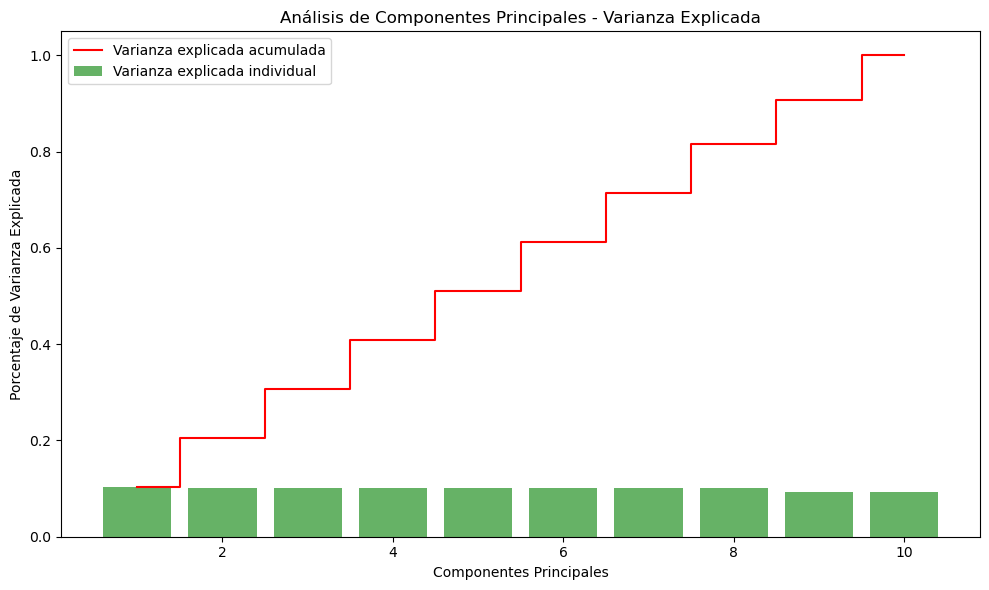

In [12]:
# Graficar la varianza explicada y la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, align='center',
        label='Varianza explicada individual', color='g')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid',
         label='Varianza explicada acumulada', color='r')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.title('Análisis de Componentes Principales - Varianza Explicada')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

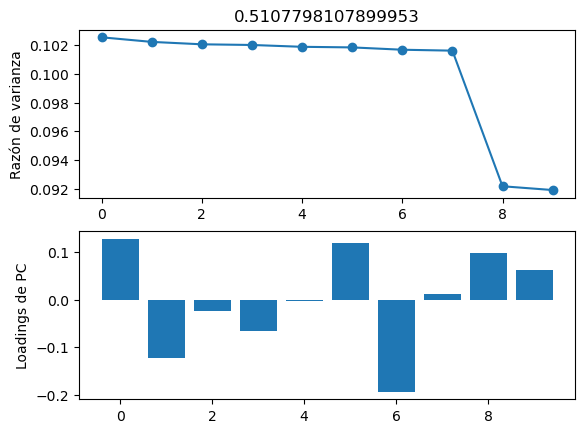

In [13]:
plt.subplot(211)
plt.plot(range(X.shape[1]),pilambda,'o-')
plt.ylabel('Razón de varianza')
plt.title(np.sum(pilambda[0:5]))
plt.subplot(212)
plt.bar(range(X.shape[1]),Xloadings[:,2])
plt.ylabel('Loadings de PC')
plt.show()

### 2.2.) ReliefF 

In [14]:
from ReliefF import ReliefF

In [28]:
# Preprocesamiento de los datos
X = df.drop(columns=['CLASS']).values  # características
y = df['CLASS'].values  # etiquetas

In [29]:
# Estandarizar los rangos de las cartas
scaler = StandardScaler()
X_scaled_r = scaler.fit_transform(X)

In [20]:
#Instanciar el objeto ReliefF
fs = ReliefF(n_neighbors=5, n_features_to_keep=None)

#Ajustamos el objeto ReliefF a los datos de entrada X y las etiquetas y
X_train = fs.fit_transform(X_scaled_r, y)

In [21]:
print("--------------")
print("(No. of Columns before ReliefF) : "+str(X.shape)+
      "\n(No. of Columns after ReliefF) : "+str(X_train.shape))

--------------
(No. of Columns before ReliefF) : (1000000, 10)
(No. of Columns after ReliefF) : (1000000, 10)
